# SUPERVISED LEARNING

#### A branch of machine learning that helps in computer modelling or decision making with the aid of labeled/training data. It deals with uncovering hidden patterns in new data from studying training data. Thus, training data must be made available. Supervised leaning is further classified into two: Classification and Regression. In supervised learning, we have some common name conventions;
. Features = predictor variables = independent variables. 

. Target variable = dependent variable = response variable.
#### In this notebook, we study classification. In classification, data values/types are usually discrete, boolean or categorical unlike the continuous variables found in regression.

### IMPORTING MODULES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# plt.style.use('ggplot')

### PREPROCESSING

In [2]:
df = pd.read_csv('house_votes.csv')

In [3]:
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [4]:
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.replace({'?':'n'}, inplace=True)
df.replace({'n':0, 'y': 1}, inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
1,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


### DESCRIPTIVE ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              434 non-null    object
 1   infants            434 non-null    int64 
 2   water              434 non-null    int64 
 3   budget             434 non-null    int64 
 4   physician          434 non-null    int64 
 5   salvador           434 non-null    int64 
 6   religious          434 non-null    int64 
 7   satellite          434 non-null    int64 
 8   aid                434 non-null    int64 
 9   missile            434 non-null    int64 
 10  immigration        434 non-null    int64 
 11  synfuels           434 non-null    int64 
 12  education          434 non-null    int64 
 13  superfund          434 non-null    int64 
 14  crime              434 non-null    int64 
 15  duty_free_exports  434 non-null    int64 
 16  eaa_rsa            434 non-null    int64 
dt

In [6]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,0.430876,0.447005,0.582949,0.405530,0.486175,0.624424,0.550691,0.557604,0.476959,0.495392,0.345622,0.391705,0.479263,0.569124,0.400922,0.617512
std,0.495770,0.497757,0.493640,0.491561,0.500386,0.484830,0.497998,0.497244,0.500045,0.500556,0.476120,0.488695,0.500146,0.495770,0.490651,0.486556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### VISUALIZATION

([<matplotlib.axis.XTick at 0x23f34dca520>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

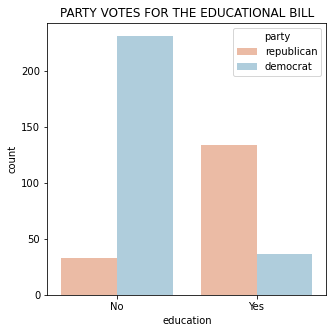

In [14]:

plt.figure(figsize=(5, 5))
plt.title('PARTY VOTES FOR THE EDUCATIONAL BILL')
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x23f34e1bf10>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

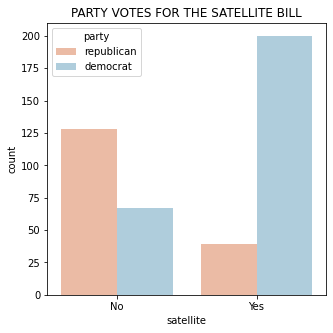

In [15]:
plt.figure(figsize=(5, 5))
plt.title('PARTY VOTES FOR THE SATELLITE BILL')
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x23f34e7ceb0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

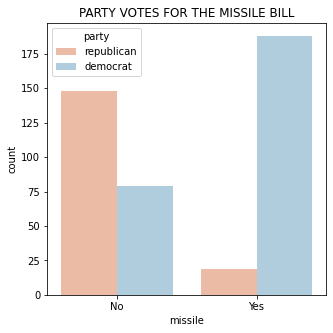

In [16]:
plt.figure(figsize=(5, 5))
plt.title('PARTY VOTES FOR THE MISSILE BILL')
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])

### K-NEAREST NEIGHBORS : FIT

In [17]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### K-NEAREST NEIGHBORS: PREDICT
This will be done with the provided unlabelled data 'X_new' given in the DataCamp. We use our classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [20]:
# changing the list into a dataframe
X_new = pd.DataFrame([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 
                      0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
                      0.398044, 0.737995]).transpose()

In [21]:
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [22]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']



### MEASURING MODEL PERFORMANCE
Accuracy is a commonly used metric here. Accuracy is given as the fraction of the number of correct predictions and total data points. We carry this out by splitting into training and test sets by;
* Fit/train the classifier on the training set.
* Make predictions on test set.
* Compare predictions with the known labels.

Model complexity is derived from k values as;
* Larger k = smoother decision boundary = less complex model.
* Smaller k = more complex model = can lead to overfitting

Higher k values also give less accurate results in both the training and test sets.

### The digits recognition dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

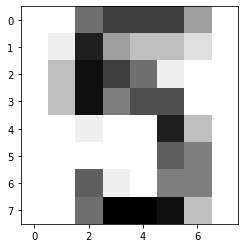

In [27]:
# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')


### TRAIN/TEST SPLIT + FIT/PREDICT/ACCURACY
Working on the digits dataset. We create arrays for the features and target variable, then split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### OVERFITTING AND UNDERFITTING


Text(0, 0.5, 'Accuracy')

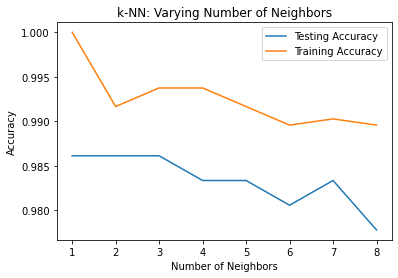

In [29]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')